## Face

In this notebook, Let's try all the things possible in face_recognition library and play around with it.
<br>
<br>
**Note:**Refer to this document: <a href='https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78'> Medium doc link</a>

In [20]:
# Importing the necessary libraries

import matplotlib.pyplot as plt
%matplotlib inline

import face_recognition

from skimage.io import imread, imshow

### 1. Reading and Finding Faces

Let's first find the faces in an image

In [5]:
# Loading an image using face_recognition library

image = face_recognition.load_image_file('./images/known/virat-kohli.jpg')

print(image)

[[[164 177 219]
  [163 176 218]
  [162 175 217]
  ...
  [179 192 224]
  [182 195 227]
  [183 196 228]]

 [[168 181 223]
  [168 181 223]
  [167 180 222]
  ...
  [184 197 229]
  [182 195 227]
  [180 193 225]]

 [[175 188 230]
  [175 188 230]
  [176 189 231]
  ...
  [187 200 232]
  [185 198 230]
  [183 196 228]]

 ...

 [[196 210 236]
  [194 208 234]
  [192 206 232]
  ...
  [200 212 238]
  [199 211 237]
  [196 208 234]]

 [[196 210 236]
  [194 208 234]
  [192 206 232]
  ...
  [196 208 234]
  [199 211 237]
  [201 213 239]]

 [[195 209 235]
  [193 207 233]
  [192 206 232]
  ...
  [192 204 230]
  [198 210 236]
  [205 217 243]]]


In [6]:
# Loading an image using skimage library

image_sk = imread('./images/known/virat-kohli.jpg')

print(image_sk)

[[[164 177 219]
  [163 176 218]
  [162 175 217]
  ...
  [179 192 224]
  [182 195 227]
  [183 196 228]]

 [[168 181 223]
  [168 181 223]
  [167 180 222]
  ...
  [184 197 229]
  [182 195 227]
  [180 193 225]]

 [[175 188 230]
  [175 188 230]
  [176 189 231]
  ...
  [187 200 232]
  [185 198 230]
  [183 196 228]]

 ...

 [[196 210 236]
  [194 208 234]
  [192 206 232]
  ...
  [200 212 238]
  [199 211 237]
  [196 208 234]]

 [[196 210 236]
  [194 208 234]
  [192 206 232]
  ...
  [196 208 234]
  [199 211 237]
  [201 213 239]]

 [[195 209 235]
  [193 207 233]
  [192 206 232]
  ...
  [192 204 230]
  [198 210 236]
  [205 217 243]]]


From this what we understand is `face_recognition.load_image_file()` & `skimage.io.imread()` does the same job of reading an image into array format.

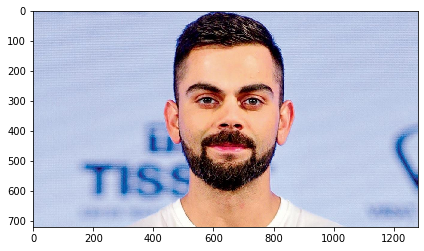

In [17]:
# Looking at the image

imshow(image_sk)

In [7]:
# Finding all the faces in an image

face_locations = face_recognition.face_locations(image)

face_locations

[(206, 812, 527, 491)]

- There is only 1 face in the given image, so the list contains only one tuple (top, right, bottom, left).

In [11]:
# Selecting the exact positions of the face and just plotting it

top, right, bottom, left = face_locations[0]

print(top)
print(right)
print(bottom)
print(left)

206
812
527
491


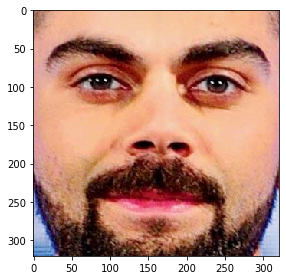

In [14]:
# Plotting only the face

imshow(image[top:bottom, left:right])

We have read and plotted for image containing 1 face. Let's try for an image containing many faces.

## 

In [15]:
# Reading an image containing many faces

image_many = imread('./images/group/cricketers.jpg')

image_many

array([[[229, 223, 225],
        [229, 223, 225],
        [229, 223, 225],
        ...,
        [225, 225, 225],
        [225, 225, 225],
        [225, 225, 225]],

       [[229, 223, 225],
        [229, 223, 225],
        [229, 223, 225],
        ...,
        [225, 225, 225],
        [225, 225, 225],
        [225, 225, 225]],

       [[229, 223, 225],
        [229, 223, 225],
        [229, 223, 225],
        ...,
        [225, 225, 225],
        [225, 225, 225],
        [225, 225, 225]],

       ...,

       [[166, 222, 245],
        [167, 224, 244],
        [170, 225, 246],
        ...,
        [232, 222, 220],
        [232, 222, 221],
        [232, 222, 220]],

       [[173, 228, 249],
        [174, 229, 250],
        [177, 229, 251],
        ...,
        [233, 222, 218],
        [233, 222, 220],
        [233, 222, 218]],

       [[180, 232, 254],
        [180, 232, 254],
        [181, 232, 253],
        ...,
        [235, 221, 218],
        [235, 221, 218],
        [235, 221, 218]]

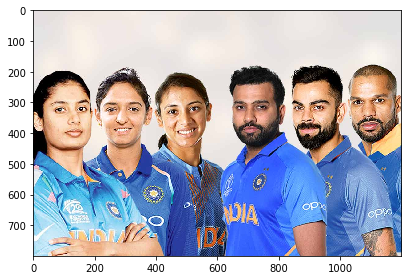

In [16]:
# Looking at the image

imshow(image_many)

In [18]:
# Finding faces in the image

face_locations = face_recognition.face_locations(image_many)

face_locations

[(270, 786, 425, 631),
 (288, 373, 442, 218),
 (263, 221, 449, 35),
 (270, 975, 425, 820),
 (253, 1164, 408, 1010),
 (288, 562, 442, 408)]

In [19]:
# Looking at the number of faces in the image

print(f'There are {len(face_locations)} faces in the given image')

There are 6 faces in the given image


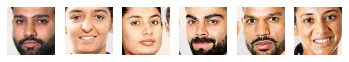

In [51]:
# Plotting only the faces in the image

fig, ax = plt.subplots(1, len(face_locations))

for index, (top, right, bottom, left) in enumerate(face_locations):
    ax[index].imshow(image_many[top:bottom, left:right])
    ax[index].axis('off')

### 2. Finding the Face Encodings

In [52]:
# Getting the face encodings of the single face of virat in an image

virat_face_encodings = face_recognition.face_encodings(image_sk)

print(virat_face_encodings)

[array([-0.07762787, -0.02284251,  0.00554296, -0.05736625, -0.04936659,
       -0.02481406, -0.00516536, -0.0433745 ,  0.19202296, -0.01528986,
        0.16083208,  0.01589218, -0.23351875, -0.03213409, -0.02363877,
       -0.00215414, -0.14004079, -0.09428135,  0.01511549, -0.0720391 ,
        0.04903524,  0.08886129,  0.03689992,  0.05560371, -0.16707568,
       -0.28385696, -0.10389118, -0.18436347,  0.0252083 , -0.10390376,
        0.02545263,  0.11498126, -0.1756449 , -0.03487821, -0.01965349,
        0.0532565 , -0.02079848, -0.10852549,  0.19158578,  0.05003175,
       -0.09998243, -0.16029602, -0.06028377,  0.28523728,  0.07662874,
        0.02254398,  0.04828053, -0.02901583,  0.11944786, -0.26574352,
        0.07705565,  0.16483821,  0.07816476,  0.02515978,  0.03919123,
       -0.13960116,  0.06838395,  0.11466961, -0.22546366,  0.07389816,
        0.03162938, -0.03831301,  0.03929027, -0.05828622,  0.22074957,
        0.05332686, -0.08618813, -0.02749873,  0.10825709, -0.1

In [57]:
len(virat_face_encodings)

1

In [55]:
len(virat_face_encodings[0])

128

- These are the 128 unique facial encodings of a face in an image. These values will be almost same or very close for the face of the same person. But it will be a very different or far apart for the face of a different person.
- This is done via a CNN.
- **Note**: These values can be stored in a database for a faster search when we are dealing with many images.

In [56]:
# Now, let's look at the face encodings of an image having multiple faces

cricketers_face_encodings = face_recognition.face_encodings(image_many)

print(cricketers_face_encodings)

[array([-1.94995567e-01,  1.81697354e-01,  1.03394210e-01, -5.92851080e-02,
       -4.87493575e-02, -4.68413346e-03,  5.34198284e-02, -2.27441918e-03,
        1.73275068e-01, -5.45988753e-02,  1.28330171e-01, -4.26782295e-02,
       -1.86964288e-01, -1.42973050e-01,  2.94795036e-02,  1.16919786e-01,
       -1.93656325e-01, -1.64531827e-01, -6.42280206e-02, -1.11812606e-01,
        8.18735361e-02,  1.72083490e-02, -5.51806986e-02,  8.89055058e-03,
       -2.04628140e-01, -3.51591736e-01, -9.63775441e-04, -1.82307318e-01,
       -2.89944932e-04, -1.13157831e-01,  1.00758066e-02, -3.39869075e-02,
       -2.02503026e-01, -1.73854604e-02, -8.10280740e-02,  1.27675146e-01,
        5.17864376e-02, -2.20285915e-02,  8.87817740e-02,  4.13072705e-02,
       -1.51740968e-01,  2.94444654e-02, -1.64584126e-02,  3.17129016e-01,
        1.78792074e-01,  3.73413526e-02,  8.62941518e-03,  1.25558842e-02,
        1.90469071e-01, -2.24810079e-01,  9.97151136e-02,  7.91936889e-02,
        7.40404502e-02, 

In [58]:
len(cricketers_face_encodings)

6

In [59]:
len(cricketers_face_encodings[0])

128

In [60]:
len(cricketers_face_encodings[1])

128

In [61]:
len(cricketers_face_encodings[2])

128

- Now the encodings is a list of 6 arrays as we have 6 faces in that image.
- Each array has 128 elements i.e the facial features of each face.

### 3. Comparining the Faces

This is the step where we compare the encodings of known and unknown faces to recognise if a face matches in an image. 

In [63]:
# Reading an image from the unknown folder which has virat kohli's image and comparing with virat's face encodings

unknown_image = imread('./images/unknown/virat-kohli-1.jpg')

# Calculating the face encodings of the uknown face

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

print(unknown_face_encodings)

[array([-0.13030422,  0.03502634,  0.02967918, -0.06457752,  0.02194871,
       -0.05802386,  0.01528403, -0.04709231,  0.21568866, -0.02370127,
        0.16654006,  0.01546353, -0.22759297, -0.11052408, -0.00937559,
        0.04067258, -0.1557349 , -0.16801688, -0.00524651, -0.06714233,
        0.07752113,  0.06119595,  0.05771261,  0.05793284, -0.21833041,
       -0.2886115 , -0.08577777, -0.20686944, -0.00979562, -0.13261367,
        0.02298665,  0.05917783, -0.21569116, -0.03730005, -0.04068247,
        0.06578206,  0.04912962, -0.08055185,  0.17157435,  0.00761646,
       -0.12682134, -0.08434796, -0.06516612,  0.27407062,  0.05502845,
       -0.01417095,  0.02960143, -0.04251128,  0.10138052, -0.22994725,
        0.06735623,  0.1639677 ,  0.04468706,  0.01059507,  0.03956624,
       -0.09939514,  0.04314104,  0.08090156, -0.25280544,  0.0458416 ,
        0.03404261,  0.02091572,  0.00315461, -0.04721661,  0.15138075,
        0.07105871, -0.10156447, -0.05749203,  0.06755996, -0.1

In [66]:
# Comparing the faces and looking at the result

results = face_recognition.compare_faces(virat_face_encodings[0], unknown_face_encodings)

print(results)

[True]


In [67]:
# Comparing with sudeep's image to check if it doesn't give a match

sudeep_image = imread('./images/unknown/sudeep.jpg')

sudeep_face_encodings = face_recognition.face_encodings(sudeep_image)

print(sudeep_face_encodings)

[array([-0.2122985 ,  0.02251322,  0.0109214 , -0.01548226, -0.02965463,
        0.00664538, -0.01756496, -0.06961343,  0.19808789, -0.0455567 ,
        0.12218887,  0.03395453, -0.14723817, -0.08877137, -0.03555255,
        0.07741054, -0.07809816, -0.14669532, -0.04742346, -0.12774616,
       -0.00730677,  0.0579475 , -0.03046899,  0.00300333, -0.13529903,
       -0.32218504, -0.05420937, -0.1085241 ,  0.05061895, -0.05522707,
       -0.02143404, -0.03260264, -0.20793772, -0.04757429,  0.05065314,
        0.20335163,  0.01481636,  0.00748266,  0.1618925 , -0.04202545,
       -0.12955746, -0.0251277 ,  0.10392381,  0.21480478,  0.14120336,
        0.07334621, -0.00447939, -0.06361108,  0.14607093, -0.17805895,
        0.09076799,  0.08795583,  0.0830578 ,  0.04109021,  0.10130338,
       -0.18102306, -0.02886377,  0.09828733, -0.1315701 ,  0.02937323,
       -0.02787848, -0.04095197, -0.12514354, -0.01306207,  0.18529904,
        0.12187196, -0.06731172, -0.17989826,  0.16471457, -0.1

In [69]:
results = face_recognition.compare_faces(sudeep_face_encodings[0], unknown_face_encodings)

print(results)

[False]


- The unknown face that we passed was actually virat kohli's. Our model returned True when we compared with Virat's face encodings and it returned 'False'when we compared with Sudeep's face encodings.

In [76]:
# Now lets compare virat's face encodings with cricketer's face encodings to find if virat is present among 
# many faces in that image

result = face_recognition.compare_faces(virat_face_encodings[0], cricketers_face_encodings)

result

[False, False, False, True, False, False]

- The 4th face in the list is of Virat Kohli's

### 4. Face Landmarks

Let's look at the face landmarks.

In [70]:
virat_face_landmarks = face_recognition.face_landmarks(image_sk)

print(virat_face_landmarks)

[{'chin': [(480, 297), (482, 341), (484, 386), (493, 433), (509, 476), (536, 509), (571, 534), (610, 552), (653, 559), (697, 555), (734, 539), (768, 512), (791, 479), (806, 438), (816, 391), (819, 347), (822, 301)], 'left_eyebrow': [(505, 276), (526, 248), (561, 240), (598, 249), (631, 265)], 'right_eyebrow': [(681, 265), (714, 249), (749, 242), (783, 252), (802, 279)], 'nose_bridge': [(657, 294), (659, 315), (660, 336), (661, 358)], 'nose_tip': [(623, 390), (640, 393), (657, 396), (674, 394), (690, 392)], 'left_eye': [(549, 303), (569, 293), (592, 293), (614, 308), (592, 312), (568, 312)], 'right_eye': [(695, 310), (718, 295), (742, 295), (759, 307), (743, 315), (719, 315)], 'top_lip': [(588, 451), (616, 443), (639, 438), (654, 441), (669, 439), (691, 447), (715, 457), (705, 457), (668, 452), (654, 452), (639, 450), (599, 452)], 'bottom_lip': [(715, 457), (690, 473), (668, 475), (652, 476), (636, 474), (613, 468), (588, 451), (599, 452), (638, 455), (653, 457), (667, 457), (705, 457)]

In [71]:
print(virat_face_landmarks[0].keys())

dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip'])


- These are the different face landmarks.
- We can use this to apply any kind of makeup's on these area's (Just an example, We can do many more things)